## Power balanced projection methods for time-continuous dynamic simulations

In [75]:
# Imports
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import rpm_module as rpm
import sympy as sp

import PH_models as model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## RPM solver for PHS conservative systems

In [76]:
"""
def gradients(x):
    grad1 = x[0] / C0
    grad2 = x[1] * L0
    return np.array((grad1, grad2))

def hessian(x):
    NPoints = x.shape[1]
    hessian = np.zeros((2,2,NPoints))
    hessian[0,0,:] = np.ones(NPoints) / C0 
    hessian[1,1,:] = np.ones(NPoints) * L0
    return hessian"""

'\ndef gradients(x):\n    grad1 = x[0] / C0\n    grad2 = x[1] * L0\n    return np.array((grad1, grad2))\n\ndef hessian(x):\n    NPoints = x.shape[1]\n    hessian = np.zeros((2,2,NPoints))\n    hessian[0,0,:] = np.ones(NPoints) / C0 \n    hessian[1,1,:] = np.ones(NPoints) * L0\n    return hessian'

In [77]:
phs_struct = model.muller.build_linear(1,1)

In [78]:
#Solver parameters
p_order = 4
k_order  = 2
sr = 5
stepSize = 1/sr
quadOrder = 20
epsilon = 10**(-15)
maxIter = 100

In [79]:
solver = rpm.RPMSolverPHS(phs_struct, p_order, k_order, stepSize,
    quadOrder, epsilon, maxIter)

(100, 2)


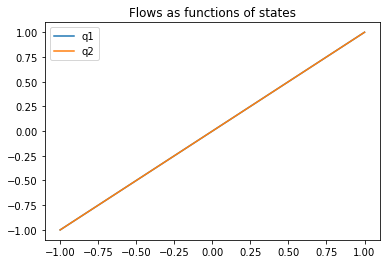

In [80]:
x = np.array([np.linspace(-1, 1, 100), np.linspace(-1, 1, 100)]).T
rpm.hp.plot_gradients(solver, np.linspace(-1, 1, 100), ["q1", "q2", "phi"])

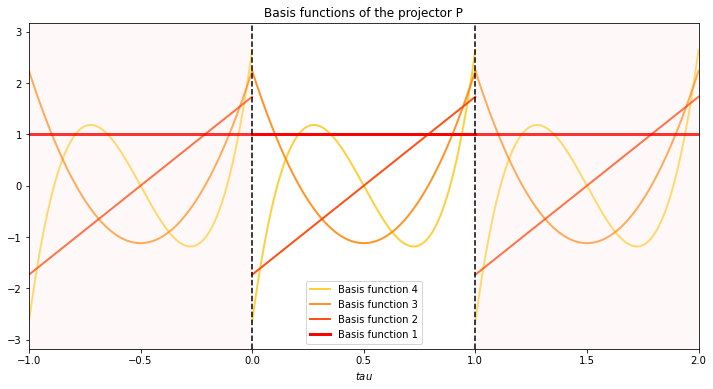

In [81]:
fig1 = rpm.hp.plot_basis_P(solver)

In [82]:
init = np.zeros(len(phs_struct["States"]), dtype= np.float64)
init[0] = 1
duration = 1000
t = np.linspace(0, duration, int(duration/stepSize))
x, dx_proj, l_mults, dx_regul = solver.simulate(init, duration)

Mean number of NR iterations : 1.0
Max number of NR iterations : 1.0,              step index : 0


In [83]:
solver.S

array([[ 0, -1],
       [ 1,  0]])

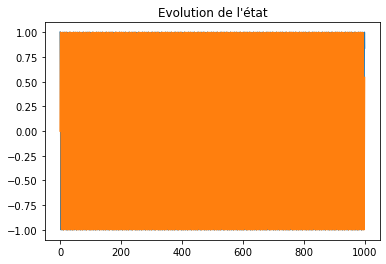

In [84]:
plt.figure()
plt.title("Evolution de l'état")
plt.plot(t[1:],x)

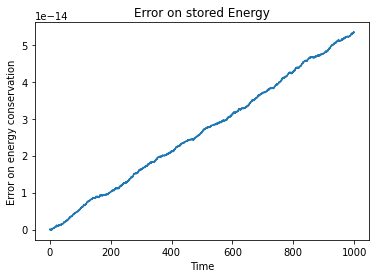

In [85]:
rpm.hp.plot_error_energy(solver, x, t)

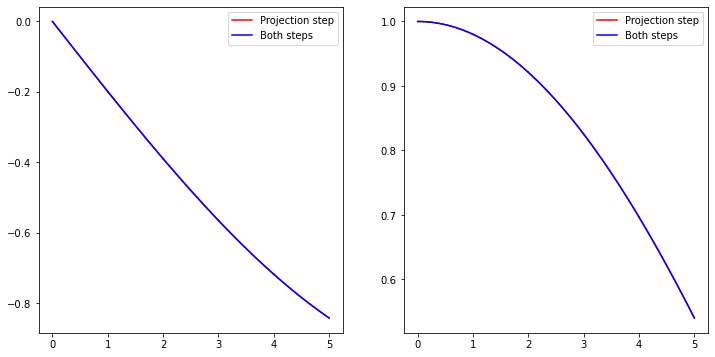

In [86]:
rpm.hp.plot_flows_trajectories(solver, dx_proj[0:5], dx_regul[0:5], N_points=50)